In [70]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2

from __future__ import division

import numpy as np
import os
#import mne
import pandas as pd
import matplotlib.pyplot as plt

from scipy import io, signal

from data_utils import *
from preprocessing import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
X_s, Y_s, Y_l = import_data(1, downsample=5)

Converting time column to int64...


In [100]:
X, Y = X_s[0], Y_s[0]

label = 1
Y = (Y == label).astype(float)
X, Y = window_series(X, Y, width=500, fs=200, nstride=20)

def split(x, split=.33):
    point = int(len(x)*split)
    return x[:point], x[point:]

(X_train, X_test), (Y_train, Y_test) = map(split, (X, Y))

print "ratio of true:false : ", sum(Y)/len(Y)

ratio of true:false :  0.331462715491


In [43]:
dim(X_train)

8173 64 100 


In [58]:
class MACE_filter:
    
    def __init__(self, fs=200):
        self.fs = fs
        pass
    
    def fit(self, X_win, Y):
        # H = D.I X (X+ D X).I u
        #
        # Lexicographic reordering and vetorizing input
        # just
        Xf = map(lambda x: x.reshape(-1), map(dft2, X_win))
        X = np.array(Xf).T
        mu_psd = sum(map(lambda x: (np.abs(x)**2), Xf))/len(Xf)
        D = mu_psd.reshape((-1,1))
        D_I = 1/D
        #
        u = np.array(Y).reshape(-1,1)
        #
        a = D_I * X
        b = np.linalg.inv(np.conj(X.T).dot(D*X))
        c = u
        print a.shape, b.shape, c.shape
        H = ( a ).dot( b ).dot( c )
        #
        self.H = H
        #
        return self

    def predict(self, X):
        pass
    

In [101]:
model = MACE_filter()
model.fit(X_train, Y_train)

(6400, 8173) (8173, 8173) (8173, 1)


<__main__.MACE_filter instance at 0x7f5fb0641680>

In [60]:
model.H.shape

(6400, 1)

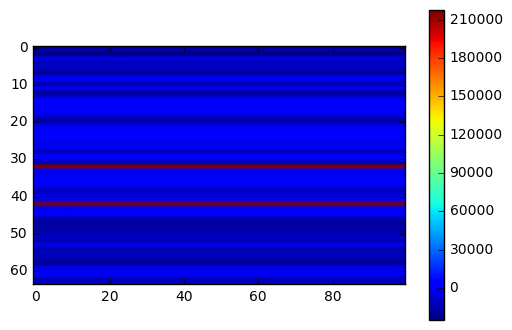

In [69]:
plt.imshow(win1)
plt.colorbar()

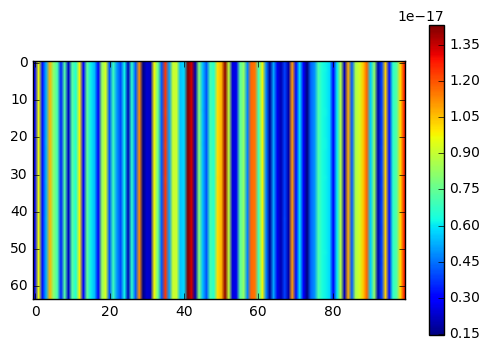

In [68]:
H = model.H.reshape(64,100)
plt.imshow(np.abs(fftpack.ifft2(H)))
plt.colorbar()

In [86]:
# test
H = model.H.squeeze()
mapper = lambda win: np.abs(fftpack.fft2(win).reshape(-1).dot(H))**2
Y_pred = map(mapper, X_test)

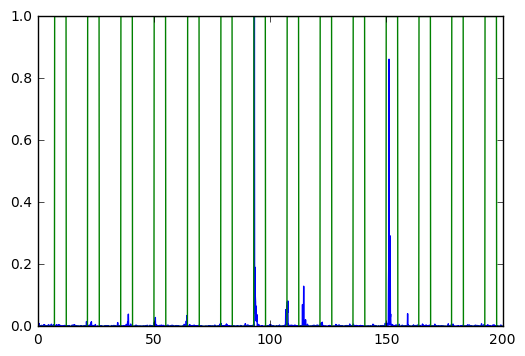

In [104]:
end = 2000
t = np.linspace(0,len(Y_test)/(200/20), len(Y_test))[:end]


plt.plot(t, np.array(Y_pred)[:end]/max(Y_pred[:end]))
plt.plot(t, np.array(Y_test)[:end])

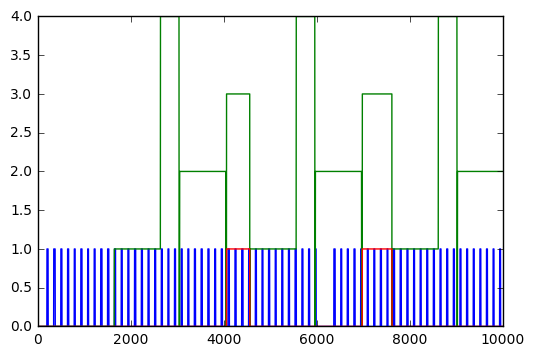

In [93]:
plt.plot(Y[:10000])
plt.plot(Y_s[0][:10000])
plt.plot((Y_s[0][:10000]==3).astype(float))

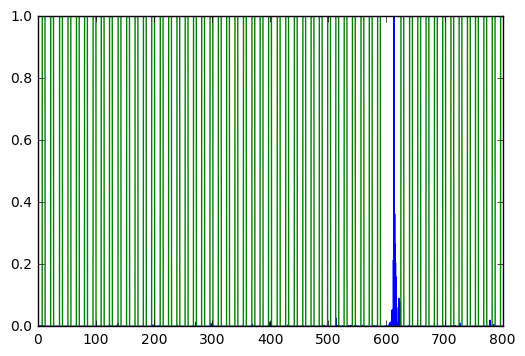

In [103]:
# training set
H = model.H.squeeze()
mapper = lambda win: np.abs(fftpack.fft2(win).reshape(-1).dot(H))**2
Y_pred2 = map(mapper, X_train)
#

end = 8000
t = np.linspace(0,len(Y_train)/(200/20), len(Y_train))[:end]


plt.plot(t, np.array(Y_pred2)[:end]/max(Y_pred2[:end]))
plt.plot(t, np.array(Y_train)[:end])

In [61]:
win1.shape

(64, 100)

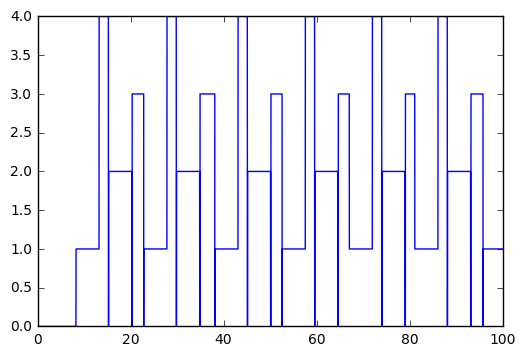

In [13]:
e = 100
y = Y_s[0][0:200*e]
secs = np.linspace(0, e, y.shape[0])
plt.plot(secs, y)

In [31]:
win1 = X[0]
dim(win1)
win1.dtype

winf = dft2(win1)
dim(winf)
winf.

64 100 
64 100 


dtype('complex128')

In [105]:
from sklearn.metrics import roc_curve

roc_train = roc_curve(Y_train, Y_pred2)
roc_test = roc_curve(Y_test, Y_pred)

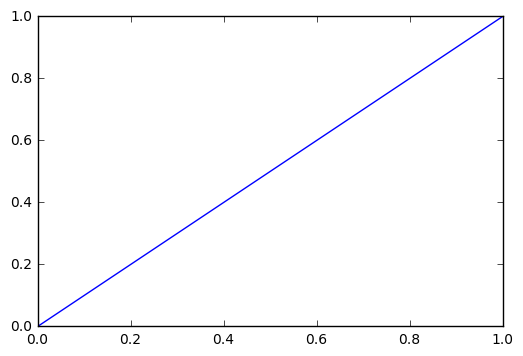

In [109]:
plt.plot(*roc_test[:2])